In [1]:
import os
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy as np
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier  as KNN
import scipy.io
from sklearn.grid_search import GridSearchCV
import time

D:\Users\alyas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Users\alyas\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df= pd.read_csv("train.csv")

In [3]:
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

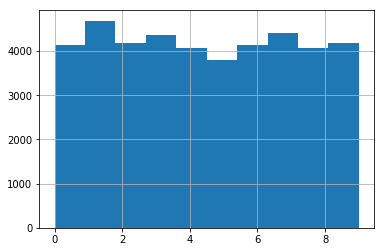

In [4]:
%matplotlib inline
df.label.hist(bins=10)

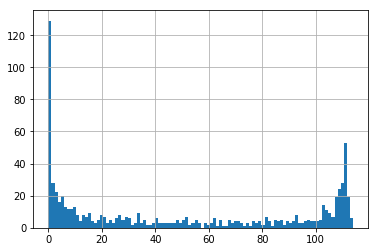

In [5]:
df.apply (np.std,axis= 0).hist(bins=100)

In [6]:
#the smaller one shows where most of the "real" data  is located

In [7]:
model =KNN (n_neighbors=5,p=2,metric='minkowski', n_jobs=-1)
#5 is the default for how many points it's going to find that are closest to that point this fits the model then we need to define it

In [8]:
[dftr,dftst] =train_test_split(df,test_size=0.1, random_state=42)

In [9]:
feature_list = list(set(df.columns.values) - set(['label']))
Xtr = dftr[feature_list]
Ytr = dftr['label']

model.fit(Xtr,Ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
#still need to do cross validation, hyper parameter tuning look in sklearn for model selection
#use gridsearch cv to perform hyper parameter

Xtst = dftst[feature_list]
Ytst = dftst['label']
Ypred = model.predict(Xtst)
## Using 5 neighbors
metrics.accuracy_score(Ytst,Ypred)

#using KNN 0.9654761904761905


#by default when you are dropping columns you need to define that you want to drop Columns....by default it drops rows..
#look into hyper parameter tuning in alteryx :)
#look into gridsearch cv...try to use the framework it helps to analyze the predictions.
#change the amount of CV (cross validations it does to see the difference)
#finish KNN for this week
#try implementing neural net-you'll see it's the same- unless you use convelusional neural net- 
#much more complex-CNN are most comonly used for images. try a simple neural net first then try to change it to CNN and improve the result.
#SVN should get you the same performance you can try it though


0.9654761904761905

In [11]:
params = {"n_neighbors": np.arange(1, 12, 5),"leaf_size":np.arange(5,11,5)}
def fcn(params):
    model=KNN(n_neighbors=params.get("n_neighbors"),leaf_size=params.get("leaf_size"),n_jobs=-1)
    return model
grid = GridSearchCV(estimator=fcn(params), param_grid=params,verbose=4,cv=2)
#start = time.time()
grid.fit(Xtr, Ytr)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] leaf_size=5, n_neighbors=1 ......................................
[CV] ............. leaf_size=5, n_neighbors=1, score=0.959953 - 2.1min
[CV] leaf_size=5, n_neighbors=1 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV] ............. leaf_size=5, n_neighbors=1, score=0.960893 - 2.0min
[CV] leaf_size=5, n_neighbors=6 ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.1min remaining:    0.0s


[CV] ............. leaf_size=5, n_neighbors=6, score=0.957203 - 2.2min
[CV] leaf_size=5, n_neighbors=6 ......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  6.3min remaining:    0.0s


[CV] ............. leaf_size=5, n_neighbors=6, score=0.958671 - 2.3min
[CV] leaf_size=5, n_neighbors=11 .....................................
[CV] ............ leaf_size=5, n_neighbors=11, score=0.952547 - 2.4min
[CV] leaf_size=5, n_neighbors=11 .....................................
[CV] ............ leaf_size=5, n_neighbors=11, score=0.954490 - 2.6min
[CV] leaf_size=10, n_neighbors=1 .....................................
[CV] ............ leaf_size=10, n_neighbors=1, score=0.959953 - 1.8min
[CV] leaf_size=10, n_neighbors=1 .....................................
[CV] ............ leaf_size=10, n_neighbors=1, score=0.960893 - 1.7min
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ............ leaf_size=10, n_neighbors=6, score=0.957203 - 1.8min
[CV] leaf_size=10, n_neighbors=6 .....................................
[CV] ............ leaf_size=10, n_neighbors=6, score=0.958671 - 1.8min
[CV] leaf_size=10, n_neighbors=11 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 24.6min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=array([ 5, 10]),
           metric='minkowski', metric_params=None, n_jobs=-1,
           n_neighbors=array([ 1,  6, 11]), p=2, weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  6, 11]), 'leaf_size': array([ 5, 10])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=4)

In [13]:
df=pd.DataFrame(result)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv',header=True)

NameError: name 'result' is not defined

In [ ]:
feature_list = list(set(train.columns.values) - set(['label']))
Xtr = dftr[feature_list]
Ytr = dftr['label']

model.fit(Xtr,Ytr)

In [ ]:
params = {"n_neighbors": np.arange(1, 30, 5),"metric": ["euclidean", "cityblock"]}

In [ ]:
print(params)
params.keys()

In [ ]:
Xtst = dftst[feature_list]
Ytst = dftst['label']
Ypred = model.predict(Xtst)

In [ ]:
df=pd.DataFrame(result)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('results.csv',header=True)